In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('prices/coin_Ethereum.csv')
training_set = dataset_train.iloc[:, 7:8].values

Import Model

In [3]:
import joblib

In [4]:
filename = 'ETH_model.pkl'
loaded_model = joblib.load(filename)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-26 22:43:08         4058
metadata.json                                  2023-02-26 22:43:08           64
variables.h5                                   2023-02-26 22:43:08       648688
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15


Getting the real stock price of 2022

In [5]:
dataset_test = pd.read_csv('test-prices/ETH-USD.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

Getting the predicted stock price of 2017

In [6]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [9]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [10]:
x_test = []
for i in range(60, len(inputs)):
  x_test.append(inputs[i-60:i, 0])
  #20 days in a month

x_test = np.array(x_test)

In [11]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [13]:
predicted_stock_price = loaded_model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

12/12 [==============================] - 4s 32ms/step


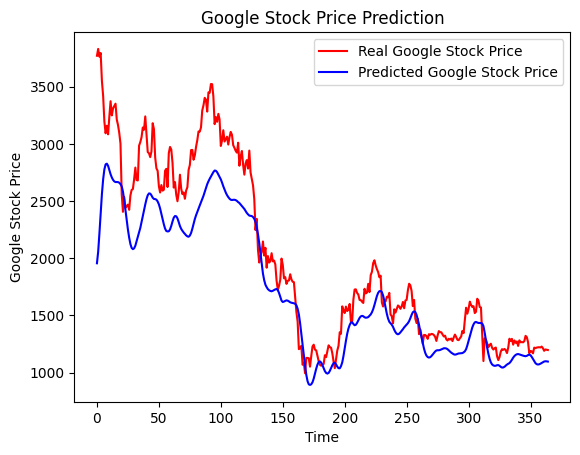

In [14]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()